In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import datetime as dt

Importing dataset

In [3]:
dataset_raw = pd.read_csv("dataset_183_adult.csv",header=0)
print(dataset_raw.head(10))

   age         workclass  fnlwgt  education  education-num  \
0    2         State-gov   77516  Bachelors             13   
1    3  Self-emp-not-inc   83311  Bachelors             13   
2    2           Private  215646    HS-grad              9   
3    3           Private  234721       11th              7   
4    1           Private  338409  Bachelors             13   
5    2           Private  284582    Masters             14   
6    3           Private  160187        9th              5   
7    3  Self-emp-not-inc  209642    HS-grad              9   
8    1           Private   45781    Masters             14   
9    2           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Mar

Exploring unique values in dataset

In [4]:
for col in dataset_raw.columns:
    print("Column: " + col)
    print("Number of unique values: " + str(pd.unique(dataset_raw[col]).shape[0]))
    uniques = pd.unique(dataset_raw[col]) 
    uniques.sort()
    print(uniques)
    # if col == 'fnlwgt':
    #     print(sorted(pd.unique(dataset_raw[col])))
    # else:
    #     print(sorted(pd.unique(dataset_raw[col])))
    print("\n")

Column: age
Number of unique values: 5
[0 1 2 3 4]


Column: workclass
Number of unique values: 9
['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


Column: fnlwgt
Number of unique values: 28523
[  12285   13492   13769 ... 1455435 1484705 1490400]


Column: education
Number of unique values: 16
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


Column: education-num
Number of unique values: 16
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


Column: marital-status
Number of unique values: 7
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']


Column: occupation
Number of unique values: 15
['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'


In [5]:
print("FnlWgt: Continuous data stats")
print("Min: " + str(dataset_raw['fnlwgt'].min()))
print("Max: " + str(dataset_raw['fnlwgt'].max()))
print("Mean: " + str(dataset_raw['fnlwgt'].mean()))
print("Variance: " + str(dataset_raw['fnlwgt'].var()))

FnlWgt: Continuous data stats
Min: 12285
Max: 1490400
Mean: 189664.13459727284
Variance: 11152210185.574848


In [6]:
for col_num in range(len(dataset_raw.columns)):
    col = str(dataset_raw.columns[col_num])
    if col == 'fnlwgt' or col == 'education_num' or col == 'class':
        pass
    else:
        print("Else")
        print(col_num)
        print(col)
        data = dict(dataset_raw.groupby(str(col)).count().fnlwgt)
        print(data)

Else
0
age
{0: 9627, 1: 12719, 2: 11952, 3: 8296, 4: 6248}
Else
1
workclass
{'?': 2799, 'Federal-gov': 1432, 'Local-gov': 3136, 'Never-worked': 10, 'Private': 33906, 'Self-emp-inc': 1695, 'Self-emp-not-inc': 3862, 'State-gov': 1981, 'Without-pay': 21}
Else
3
education
{'10th': 1389, '11th': 1812, '12th': 657, '1st-4th': 247, '5th-6th': 509, '7th-8th': 955, '9th': 756, 'Assoc-acdm': 1601, 'Assoc-voc': 2061, 'Bachelors': 8025, 'Doctorate': 594, 'HS-grad': 15784, 'Masters': 2657, 'Preschool': 83, 'Prof-school': 834, 'Some-college': 10878}
Else
4
education-num
{1: 83, 2: 247, 3: 509, 4: 955, 5: 756, 6: 1389, 7: 1812, 8: 657, 9: 15784, 10: 10878, 11: 2061, 12: 1601, 13: 8025, 14: 2657, 15: 834, 16: 594}
Else
5
marital-status
{'Divorced': 6633, 'Married-AF-spouse': 37, 'Married-civ-spouse': 22379, 'Married-spouse-absent': 628, 'Never-married': 16117, 'Separated': 1530, 'Widowed': 1518}
Else
6
occupation


{'?': 2809, 'Adm-clerical': 5611, 'Armed-Forces': 15, 'Craft-repair': 6112, 'Exec-managerial': 6086, 'Farming-fishing': 1490, 'Handlers-cleaners': 2072, 'Machine-op-inspct': 3022, 'Other-service': 4923, 'Priv-house-serv': 242, 'Prof-specialty': 6172, 'Protective-serv': 983, 'Sales': 5504, 'Tech-support': 1446, 'Transport-moving': 2355}
Else
7
relationship
{'Husband': 19716, 'Not-in-family': 12583, 'Other-relative': 1506, 'Own-child': 7581, 'Unmarried': 5125, 'Wife': 2331}
Else
8
race
{'Amer-Indian-Eskimo': 470, 'Asian-Pac-Islander': 1519, 'Black': 4685, 'Other': 406, 'White': 41762}
Else
9
sex
{'Female': 16192, 'Male': 32650}
Else
10
capitalgain
{0: 44807, 1: 1088, 2: 1279, 3: 534, 4: 1134}
Else
11
capitalloss
{0: 46560, 1: 387, 2: 779, 3: 795, 4: 321}
Else
12
hoursperweek


{0: 4453, 1: 5879, 2: 27809, 3: 9025, 4: 1676}
Else
13
native-country
{'?': 857, 'Cambodia': 28, 'Canada': 182, 'China': 122, 'Columbia': 85, 'Cuba': 138, 'Dominican-Republic': 103, 'Ecuador': 45, 'El-Salvador': 155, 'England': 127, 'France': 38, 'Germany': 206, 'Greece': 49, 'Guatemala': 88, 'Haiti': 75, 'Holand-Netherlands': 1, 'Honduras': 20, 'Hong': 30, 'Hungary': 19, 'India': 151, 'Iran': 59, 'Ireland': 37, 'Italy': 105, 'Jamaica': 106, 'Japan': 92, 'Laos': 23, 'Mexico': 951, 'Nicaragua': 49, 'Outlying-US(Guam-USVI-etc)': 23, 'Peru': 46, 'Philippines': 295, 'Poland': 87, 'Portugal': 67, 'Puerto-Rico': 184, 'Scotland': 21, 'South': 115, 'Taiwan': 65, 'Thailand': 30, 'Trinadad&Tobago': 27, 'United-States': 43832, 'Vietnam': 86, 'Yugoslavia': 23}


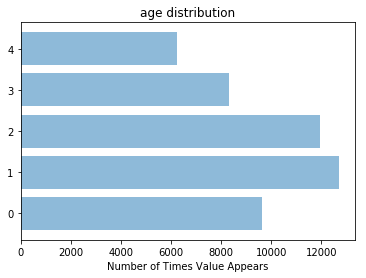

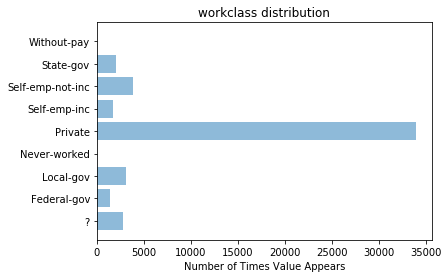

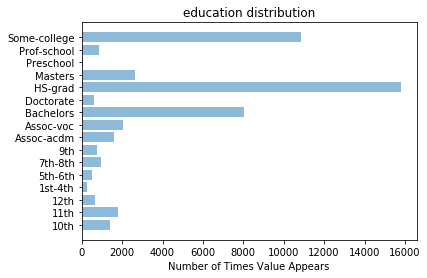

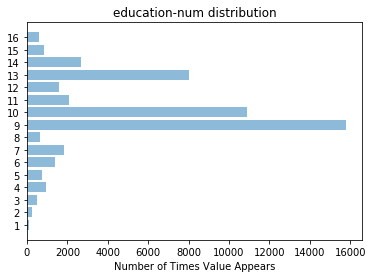

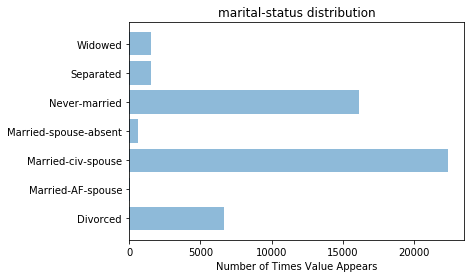

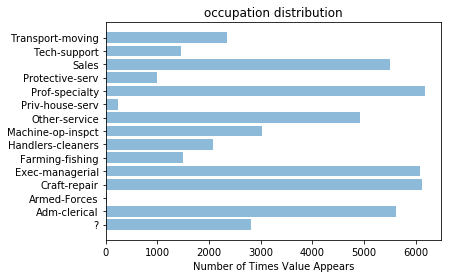

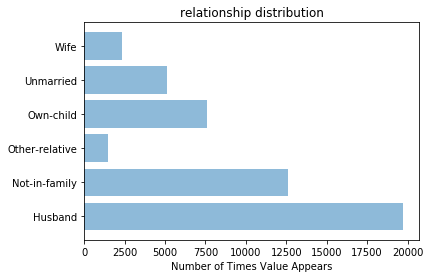

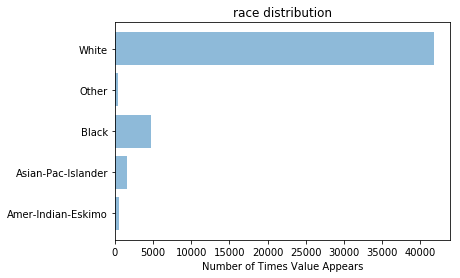

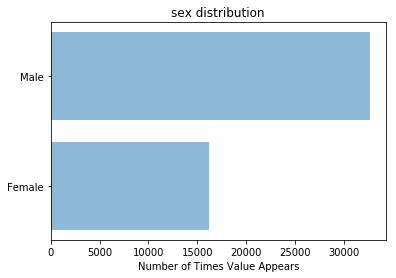

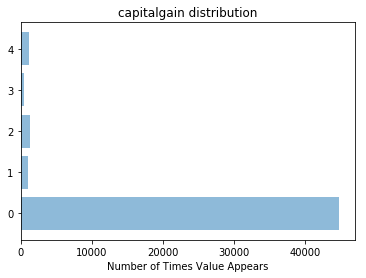

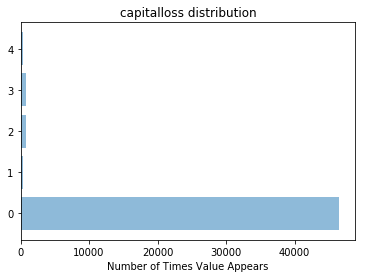

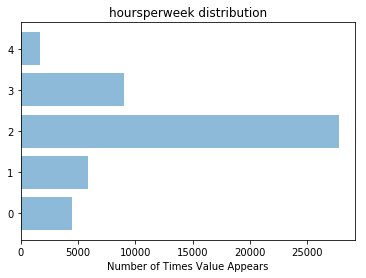

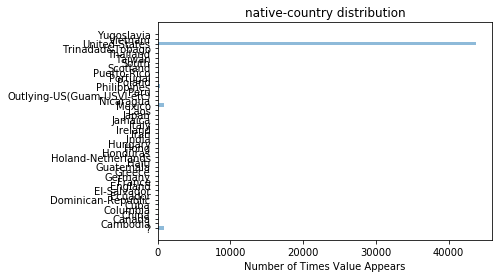

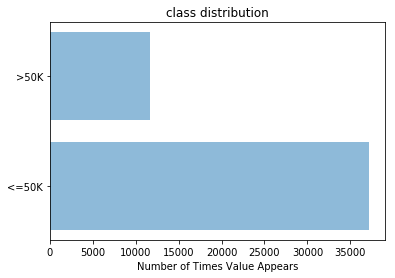

In [7]:
for col_num in range(len(dataset_raw.columns)):
    col = dataset_raw.columns[col_num]
    if col == 'fnlwgt' or col == 'education_num':
        pass
    else:
        data = dict(dataset_raw.groupby(col).count().fnlwgt)
        names = data.keys()
        y_pos = np.arange(len(names))
        values = list(data.values())
        plt.barh(y_pos, values, align='center', alpha=0.5)
        plt.yticks(y_pos, names)
        plt.xlabel('Number of Times Value Appears')
        plt.title(col + " distribution")
        plt.show()

Since the dataset has mostly categorical data we will need to factorize them. Age, capitalloss, capitalgain, hoursperweek and education-num are factorized so we don't need to touch them. Education and education-num have a 1-1 relationship where education num is the factorized version so we can remove that column.
On the other hand fnlwgt is a continuous number, so depending on the algorithm we are using we will need to normalize using either z-score or min-max

Factorizing the categorical data

In [8]:
factorized_all = dataset_raw.loc[:, dataset_raw.columns != 'education'].copy()
to_factorize = ['class','native-country', 'sex', 'race', 'relationship', 'occupation', 'marital-status', 'workclass']
stacked = factorized_all[to_factorize].stack()
factorized_all[to_factorize] = pd.Series(stacked.factorize()[0], index=stacked.index).unstack().rank(method='dense')

In [9]:
for col in factorized_all.columns:
    print("Column: " + col)
    print("Number of unique values: " + str(pd.unique(factorized_all[col]).shape[0]))
    print(pd.unique(factorized_all[col]))
    print("\n")

Column: age
Number of unique values: 5
[2 3 1 0 4]


Column: workclass
Number of unique values: 9
[1. 2. 3. 5. 6. 4. 7. 8. 9.]


Column: fnlwgt
Number of unique values: 28523
[ 77516  83311 215646 ... 173449  89686 350977]


Column: education-num
Number of unique values: 16
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Column: marital-status
Number of unique values: 7
[1. 2. 3. 4. 5. 6. 7.]


Column: occupation
Number of unique values: 15
[ 1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12.  7. 13. 14. 15.]


Column: relationship
Number of unique values: 6
[1. 2. 3. 4. 5. 6.]


Column: race
Number of unique values: 5
[1. 2. 3. 4. 5.]


Column: sex
Number of unique values: 2
[1. 2.]


Column: capitalgain
Number of unique values: 5
[1 0 4 2 3]


Column: capitalloss
Number of unique values: 5
[0 3 1 2 4]


Column: hoursperweek
Number of unique values: 5
[2 0 3 4 1]


Column: native-country
Number of unique values: 42
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 

Now that the data is factorized we need to min max normalize all features

In [10]:
normal_min_max = factorized_all.copy().values
min_max_scaler = preprocessing.MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(normal_min_max)
print(dataset_scaled.shape)
print(dataset_scaled[0:20,:])

(48842, 14)
[[0.5        0.         0.04413121 0.8        0.         0.
  0.         0.         0.         0.25       0.         0.5
  0.         0.        ]
 [0.75       0.125      0.04805174 0.8        0.16666667 0.07142857
  0.2        0.         0.         0.         0.         0.
  0.         0.        ]
 [0.5        0.25       0.13758131 0.53333333 0.33333333 0.14285714
  0.         0.         0.         0.         0.         0.5
  0.         0.        ]
 [0.75       0.25       0.15048626 0.4        0.16666667 0.14285714
  0.2        0.25       0.         0.         0.         0.5
  0.         0.        ]
 [0.25       0.25       0.22063507 0.8        0.16666667 0.21428571
  0.4        0.25       1.         0.         0.         0.5
  0.02439024 0.        ]
 [0.5        0.25       0.18421909 0.86666667 0.16666667 0.07142857
  0.4        0.         1.         0.         0.         0.5
  0.         0.        ]
 [0.75       0.25       0.10006123 0.26666667 0.5        0.28571429
  0. 

Calculate correlation: Since the data is categorical we have to use Cramer's V to generate proper correlation values. Cramer's V is a way to calculate correlation between nominal values and is a spin off of normal pearson correlation. It returns a value between 0 and 1 similar to pearson correlation and is based on the chi-squared statistic

In [11]:
# Credit to https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix since I don't fully understand this
def cramers_corrected_stat(confusion_mat):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_mat)[0]
    n = confusion_mat.sum().sum()
    phi2 = chi2/n
    r,k = confusion_mat.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

Now we make a function for showing the correlation matrix

In [12]:
def show_corr(corr_columns, corr):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr, interpolation='nearest')
    plt.xticks(range(len(corr_columns)), corr_columns, rotation='vertical')
    plt.yticks(range(len(corr_columns)), corr_columns)
    fig.colorbar(cax, ticks=[-1,-.9,-.8,-.7,-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

Now we get the correlations and show the correlation matrix (without fnlwgt since it is not nominal)

age


workclass


education-num


marital-status


occupation
relationship


race
sex
capitalgain


capitalloss
hoursperweek
native-country
class


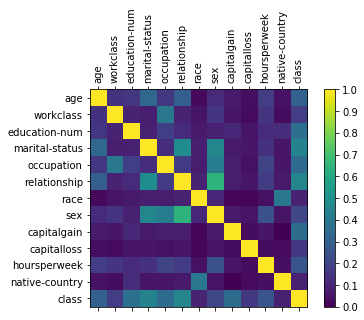

In [16]:
corr_columns = list(factorized_all.columns)
corr_columns.remove('fnlwgt')
corr = []
for i in range(len(corr_columns)):
    col1 = corr_columns[i]
    corr_1 = []
    for j in range(len(corr_columns)):
        # if we are comparing a column to itself the correlation is 1, lets not waste computation time
        if (j == i):
            corr_1.append(1)
        # if j is less than i we have already done this correlation, use the already calculated value
        elif (j < i):
            corr_1.append(corr[j][i])
        # otherwise we need to calculate and append the new value
        else:
            col2 = corr_columns[j]
            confusion = pd.crosstab(factorized_all[col1], factorized_all[col2])
            corr_1.append(cramers_corrected_stat(confusion))
    corr.append(corr_1)
show_corr(corr_columns, corr)

Now that the dataset has been factorized and normalized, we can build our models

First, we implement a function to retrieve the best model given to us from k-fold-cross validation

In [32]:
def get_best_model_from_kf(model, k=10, threshold=.5):
    start = dt.datetime.now()
    ideal = model
    kf = KFold(n_splits=k)
    i = 0
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    stats = {}
    stats['max_precision'] = -1
    stats['max_p_acc'] = -1
    stats['max_p_recall'] = -1
    stats['max_iteration'] = 0
    for train_index, test_index in kf.split(dataset_scaled):
    
        train, test = dataset_scaled[train_index], dataset_scaled[test_index]
        fitted = model.fit(train[:,0:12],train[:,13])
        predictions = fitted.predict_proba(test[:,0:12])
        # classed = (predictions[:,1] > threshold).astype()
        if threshold is not None:
            predictions[:,1] = (predictions[:,1] > threshold).astype(int)
        fpr, tpr, thresholds = roc_curve(test[:,13], predictions[:,1])
        # predictions = fitted.predict(test[:,0:12])
        c_matrix = confusion_matrix(test[:,13], predictions[:,1])
        tn, fp, fn, tp = c_matrix.ravel()
        precision = tp / (tp + fp)
        if (precision > stats['max_precision']):
            stats['max_precision'] = precision
            stats['max_iteration'] = i
            stats['max_p_recall'] = tp / (tp + fn)
            stats['max_p_acc'] = (tp + tn) / (tn + fp + fn + tp)
            ideal = fitted
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
        
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Maximum Precision = %.2f at fold %d' % (stats['max_precision'], stats['max_iteration']))
    plt.legend(loc="lower right")
    plt.show()
    for key in stats.keys():
        print(key + ": " + str(stats[key]))
    print("Runtime: " + str(dt.datetime.now() - start))
    return ideal

Logistic Regression

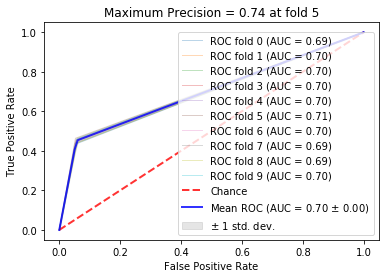

max_precision: 0.7359249329758714
max_p_acc: 0.8296478296478297
max_p_recall: 0.46368243243243246
max_iteration: 5
Runtime: 0:00:02.488426


In [21]:
logreg_1 = LogisticRegression(solver="liblinear")
get_best_model_from_kf(logreg_1,k=10,threshold=.5)

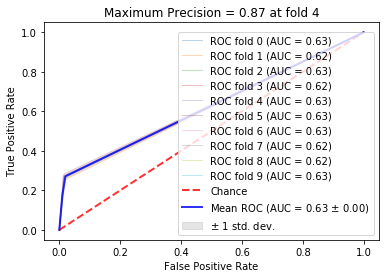

{'max_precision': 0.8729729729729729,
 'max_p_acc': 0.8128583128583129,
 'max_p_recall': 0.2714285714285714,
 'max_iteration': 4}

In [78]:
get_best_model_from_kf(logreg_1,k=10,threshold=.7)

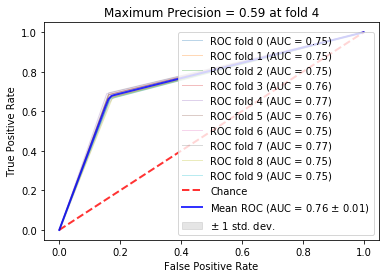

{'max_precision': 0.5873925501432665,
 'max_p_acc': 0.8063063063063063,
 'max_p_recall': 0.6890756302521008,
 'max_iteration': 4}

In [86]:
get_best_model_from_kf(logreg_1,k=10,threshold=.3)

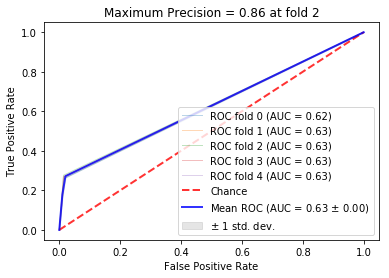

{'max_precision': 0.8642951251646904,
 'max_p_acc': 0.8135749385749386,
 'max_p_recall': 0.2763268744734625,
 'max_iteration': 2}

In [87]:
get_best_model_from_kf(logreg_1,k=5,threshold=.7)

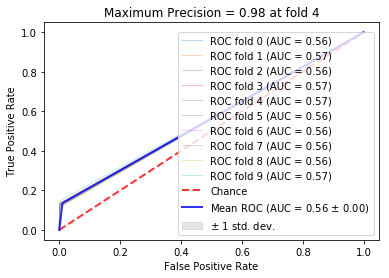

{'max_precision': 0.9751552795031055,
 'max_p_acc': 0.7876740376740377,
 'max_p_recall': 0.1319327731092437,
 'max_iteration': 4}

In [88]:
get_best_model_from_kf(logreg_1,k=10,threshold=.9)

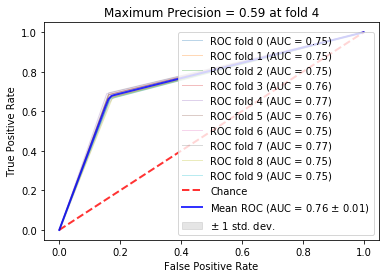

{'max_precision': 0.5873925501432665,
 'max_p_acc': 0.8063063063063063,
 'max_p_recall': 0.6890756302521008,
 'max_iteration': 4}

In [89]:
get_best_model_from_kf(logreg_1,k=10,threshold=.3)

kNN

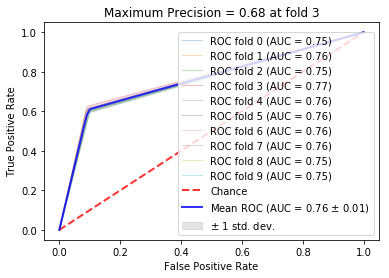

max_precision: 0.6812674743709226
max_p_acc: 0.8404995904995906
max_p_recall: 0.6258561643835616
max_iteration: 3
Runtime: 0:00:26.380982


In [25]:
knn1 = KNeighborsClassifier(n_neighbors=5)
get_best_model_from_kf(knn1, k=10, threshold=.5)

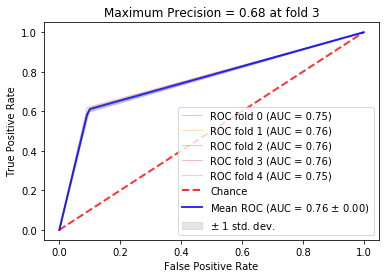

{'max_precision': 0.6812411847672779,
 'max_p_acc': 0.8392710892710893,
 'max_p_recall': 0.618966253737719,
 'max_iteration': 3}

In [91]:
get_best_model_from_kf(knn1, k=5, threshold=.5)

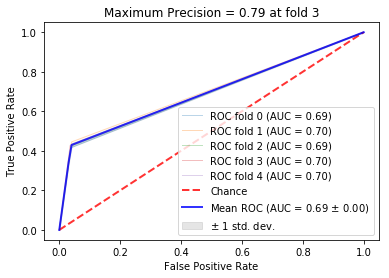

{'max_precision': 0.7905138339920948,
 'max_p_acc': 0.8355855855855856,
 'max_p_recall': 0.42716787697565145,
 'max_iteration': 3}

In [92]:
get_best_model_from_kf(knn1, k=5, threshold=.7)

In [24]:
get_best_model_from_kf(knn1, k=10, threshold=.7)

NameError: name 'knn1' is not defined

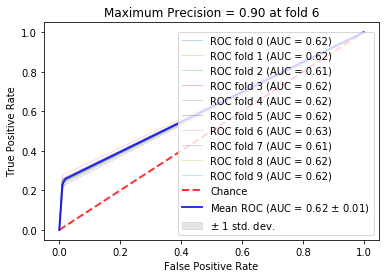

max_precision: 0.9021739130434783
max_p_acc: 0.8144963144963145
max_p_recall: 0.2762063227953411
max_iteration: 6
Runtime: 0:00:37.902179


In [26]:
get_best_model_from_kf(knn1, k=10, threshold=.9)

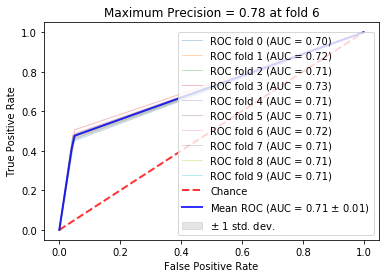

{'max_precision': 0.7788203753351206,
 'max_p_acc': 0.8390663390663391,
 'max_p_recall': 0.48336106489184694,
 'max_iteration': 6}

In [95]:
knn2 = KNeighborsClassifier(n_neighbors=7)
get_best_model_from_kf(knn2, k=10, threshold=.7)

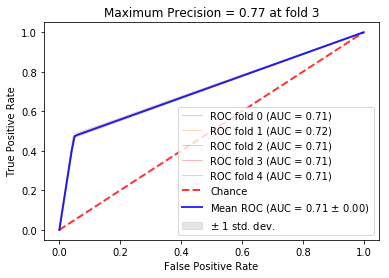

{'max_precision': 0.7667597765363129,
 'max_p_acc': 0.8385544635544635,
 'max_p_recall': 0.46903032891926527,
 'max_iteration': 3}

In [96]:
get_best_model_from_kf(knn2, k=5, threshold=.7)

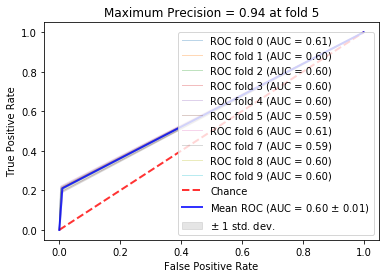

{'max_precision': 0.9414225941422594,
 'max_p_acc': 0.8007780507780508,
 'max_p_recall': 0.19003378378378377,
 'max_iteration': 5}

In [97]:
get_best_model_from_kf(knn2, k=10, threshold=.9)

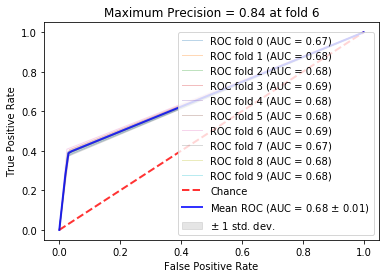

max_precision: 0.8421955403087479
max_p_acc: 0.8355855855855856
max_p_recall: 0.4084858569051581
max_iteration: 6
Runtime: 0:00:29.135702


In [28]:
knn3 = KNeighborsClassifier(n_neighbors=9)
get_best_model_from_kf(knn3, k=10, threshold=.7)

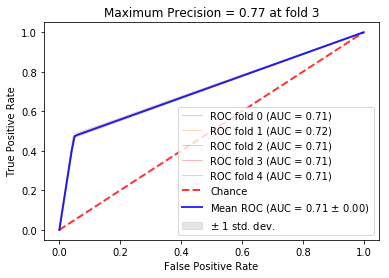

{'max_precision': 0.7667597765363129,
 'max_p_acc': 0.8385544635544635,
 'max_p_recall': 0.46903032891926527,
 'max_iteration': 3}

In [101]:
get_best_model_from_kf(knn3, k=5, threshold=.7)

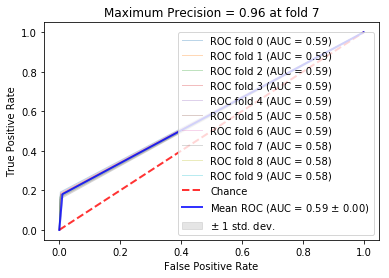

max_precision: 0.9619565217391305
max_p_acc: 0.8015970515970516
max_p_recall: 0.15539947322212466
max_iteration: 7


In [15]:
get_best_model_from_kf(knn3, k=10, threshold=.9)

LDA

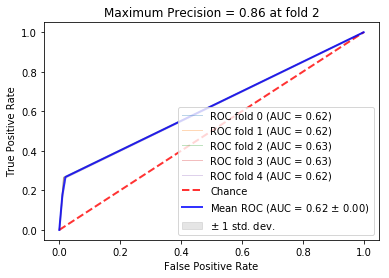

max_precision: 0.858887381275441
max_p_acc: 0.8111179361179361
max_p_recall: 0.2666385846672283
max_iteration: 2
Runtime: 0:00:01.184589


In [22]:
lda_svd = LinearDiscriminantAnalysis(solver='svd')
get_best_model_from_kf(lda_svd, k=5, threshold=.7)

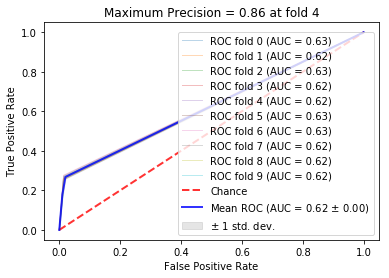

{'max_precision': 0.8647887323943662,
 'max_p_acc': 0.8093775593775594,
 'max_p_recall': 0.25798319327731095,
 'max_iteration': 4}

In [105]:
get_best_model_from_kf(lda_svd, k=10, threshold=.7)

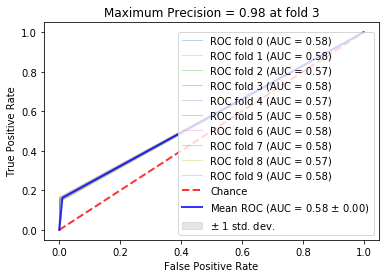

max_precision: 0.9796954314720813
max_p_acc: 0.7995495495495496
max_p_recall: 0.16523972602739725
max_iteration: 3
Runtime: 0:00:02.021158


In [23]:
get_best_model_from_kf(lda_svd, k=10, threshold=.9)

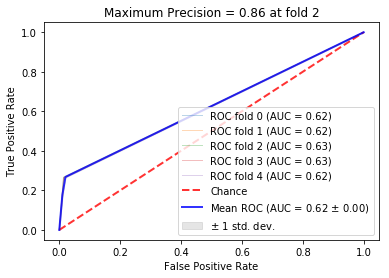

max_precision: 0.858887381275441
max_p_acc: 0.8111179361179361
max_p_recall: 0.2666385846672283
max_iteration: 2


In [18]:
lda_lsqr = LinearDiscriminantAnalysis(solver='lsqr')
get_best_model_from_kf(lda_lsqr, k=5, threshold=.7)

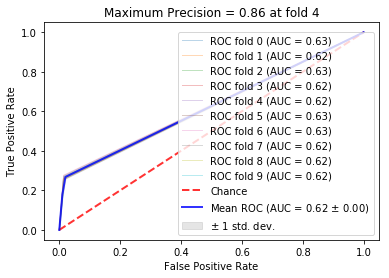

{'max_precision': 0.8647887323943662,
 'max_p_acc': 0.8093775593775594,
 'max_p_recall': 0.25798319327731095,
 'max_iteration': 4}

In [109]:
get_best_model_from_kf(lda_lsqr, k=10, threshold=.7)

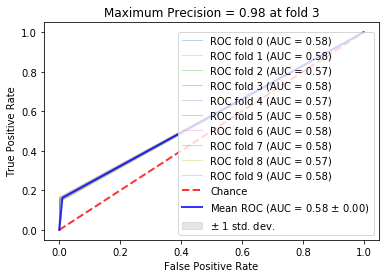

{'max_precision': 0.9796954314720813,
 'max_p_acc': 0.7995495495495496,
 'max_p_recall': 0.16523972602739725,
 'max_iteration': 3}

In [110]:
get_best_model_from_kf(lda_lsqr, k=10, threshold=.9)

Decision Tree

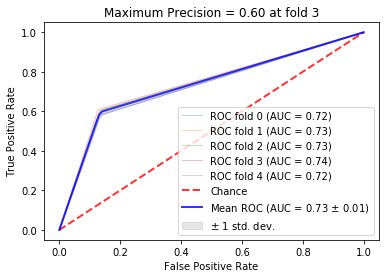

{'max_precision': 0.6006739679865206,
 'max_p_acc': 0.8092751842751843,
 'max_p_recall': 0.609141392567279,
 'max_iteration': 3}

In [117]:
dt_max_none = DecisionTreeClassifier(criterion='entropy')
get_best_model_from_kf(dt_max_none, k=5, threshold=.7)

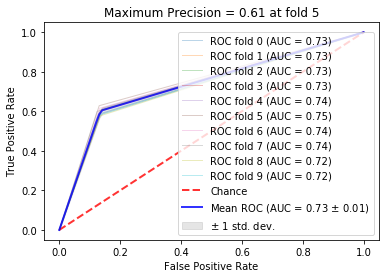

{'max_precision': 0.6053702196908055,
 'max_p_acc': 0.8106060606060606,
 'max_p_recall': 0.6283783783783784,
 'max_iteration': 5}

In [118]:
get_best_model_from_kf(dt_max_none, k=10, threshold=.7)

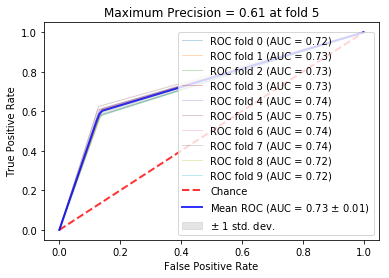

{'max_precision': 0.6075533661740559,
 'max_p_acc': 0.8112203112203112,
 'max_p_recall': 0.625,
 'max_iteration': 5}

In [120]:
get_best_model_from_kf(dt_max_none, k=10, threshold=.9)

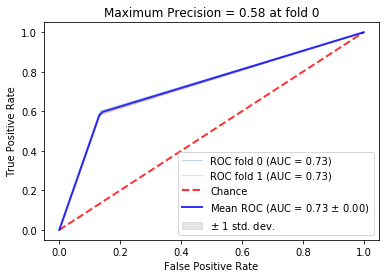

{'max_precision': 0.5840106153590977,
 'max_p_acc': 0.8018099176937882,
 'max_p_recall': 0.6015718434990603,
 'max_iteration': 0}

In [121]:
get_best_model_from_kf(dt_max_none, k=2, threshold=.9)

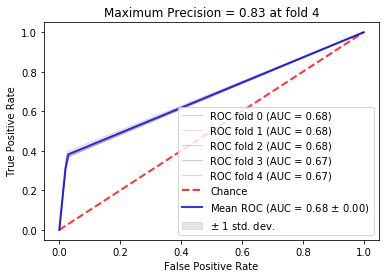

max_precision: 0.8325171400587659
max_p_acc: 0.8331285831285832
max_p_recall: 0.36812472932005197
max_iteration: 4
Runtime: 0:00:01.088605


In [30]:
dt_max_10 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
get_best_model_from_kf(dt_max_10, k=5, threshold=.7)

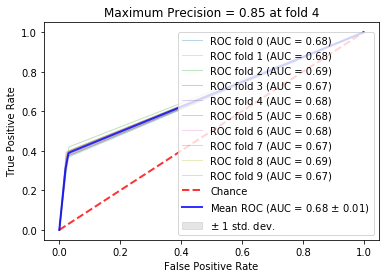

max_precision: 0.8490909090909091
max_p_acc: 0.834971334971335
max_p_recall: 0.39243697478991596
max_iteration: 4
Runtime: 0:00:02.229156


In [33]:
ideal_dt_10 = get_best_model_from_kf(dt_max_10, k=10, threshold=.7)

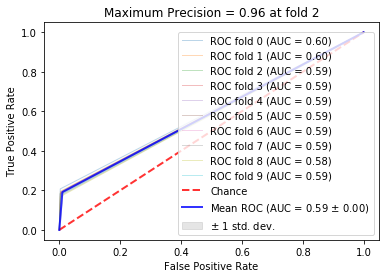

{'max_precision': 0.9557522123893806,
 'max_p_acc': 0.8022113022113022,
 'max_p_recall': 0.18430034129692832,
 'max_iteration': 2}

In [124]:
get_best_model_from_kf(dt_max_10, k=10, threshold=.9)

Random Forests

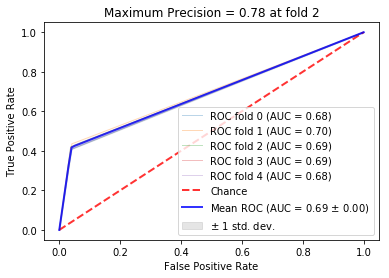

{'max_precision': 0.7831893165750197,
 'max_p_acc': 0.8307739557739557,
 'max_p_recall': 0.41996630160067394,
 'max_iteration': 2}

In [125]:
rf_10 = RandomForestClassifier(n_estimators=10, criterion='entropy')
get_best_model_from_kf(rf_10, k=5, threshold=.7)

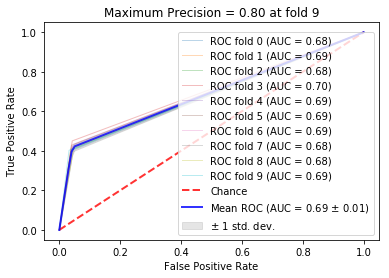

{'max_precision': 0.797274275979557,
 'max_p_acc': 0.8335380835380836,
 'max_p_recall': 0.4027538726333907,
 'max_iteration': 9}

In [126]:
get_best_model_from_kf(rf_10, k=10, threshold=.7)

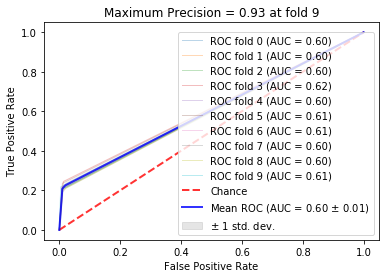

{'max_precision': 0.933579335793358,
 'max_p_acc': 0.8101965601965602,
 'max_p_recall': 0.21772805507745266,
 'max_iteration': 9}

In [127]:
get_best_model_from_kf(rf_10, k=10, threshold=.9)

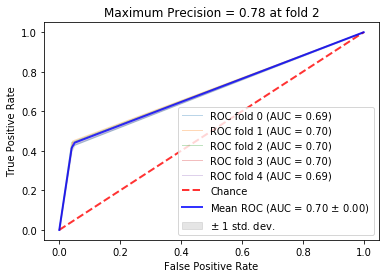

{'max_precision': 0.7785185185185185,
 'max_p_acc': 0.833947583947584,
 'max_p_recall': 0.44271272114574556,
 'max_iteration': 2}

In [128]:
rf_50 = RandomForestClassifier(n_estimators=50, criterion='entropy')
get_best_model_from_kf(rf_50, k=5, threshold=.7)

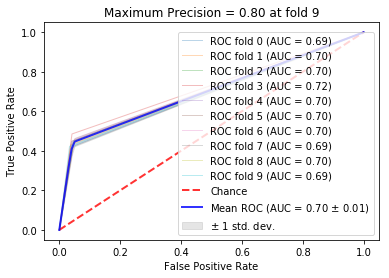

{'max_precision': 0.797077922077922,
 'max_p_acc': 0.8370188370188371,
 'max_p_recall': 0.4225473321858864,
 'max_iteration': 9}

In [133]:
get_best_model_from_kf(rf_50, k=10, threshold=.7)

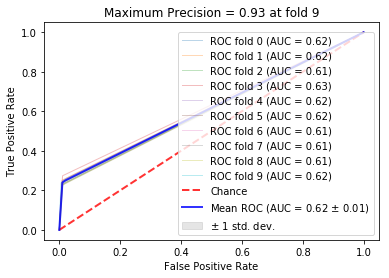

{'max_precision': 0.9324324324324325,
 'max_p_acc': 0.8144963144963145,
 'max_p_recall': 0.23752151462994836,
 'max_iteration': 9}

In [132]:
get_best_model_from_kf(rf_50, k=10, threshold=.9)

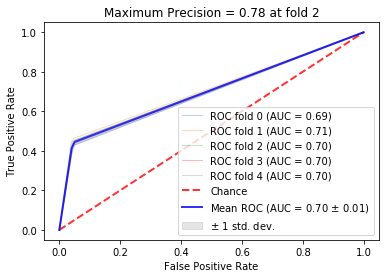

{'max_precision': 0.7820324005891016,
 'max_p_acc': 0.8353808353808354,
 'max_p_recall': 0.44734625105307496,
 'max_iteration': 2}

In [131]:
rf_100 = RandomForestClassifier(n_estimators=100, criterion='entropy')
get_best_model_from_kf(rf_100, k=5, threshold=.7)

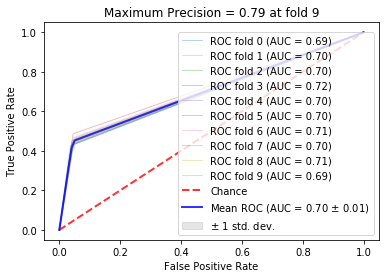

{'max_precision': 0.7869634340222575,
 'max_p_acc': 0.835995085995086,
 'max_p_recall': 0.4259896729776248,
 'max_iteration': 9}

In [134]:
get_best_model_from_kf(rf_100, k=10, threshold=.7)

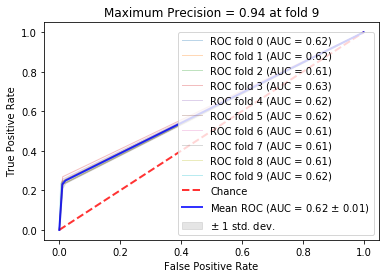

{'max_precision': 0.9415807560137457,
 'max_p_acc': 0.8147010647010647,
 'max_p_recall': 0.23580034423407917,
 'max_iteration': 9}

In [135]:
get_best_model_from_kf(rf_100, k=10, threshold=.9)

In [21]:
print(sum(dataset_scaled[:,13])/len(dataset_scaled[:,13]))

0.23928176569346055


Calculate Feature Importance with the Ideal Decision Tree Classifier

In [37]:
print(ideal_dt_10.feature_importances_)
print(factorized_all.columns)
print(len(ideal_dt_10.feature_importances_))
print(len(factorized_all.columns))

[0.05124531 0.00939347 0.01927534 0.21048023 0.43130968 0.02566193
 0.00455036 0.00410163 0.00723946 0.167768   0.02945959 0.03951499]
Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native-country', 'class'],
      dtype='object')
12
14
